In [202]:
import numpy as np
import matplotlib.pyplot as plt

def getW(K,d):
    w = np.random.randn(K,d,d)
    return w

def getb(K,d):
    b = np.random.randn(K,d,1)
    return b

def getomega(d):
    omega = np.random.randn(d,1)
    return omega

def getmu():
    mu = np.random.randn(1)
    return mu


def getdJdmu(Z, ypsilon, c, omega, mu, K, eta_div):
    u = np.transpose(Z[K-1])@omega + mu
    
    dJdmu = np.transpose(eta_div(u))@(ypsilon-c)

    return dJdmu

def getdJdomega(Z, ypsilon, c, omega, mu, K, eta_div):
    dJdOmega = Z[K-1] @ ((ypsilon - c) * eta_div( np.transpose(Z[K-1]) @ omega + mu))
    return dJdOmega

def getdJdW(P, Z, W, b, K, h, sigma_div):
    dJdW = np.zeros_like(W)
    for k in range(K):
        dJdW[k] = h*(P[k+1]*sigma_div(W[k]@Z[k]+b[k]))@np.transpose(Z[k])    
    return dJdW

def getdJdb(P, Z, W, b, K, h, sigma_div):
    dJdb = np.zeros_like(b)
    for k in range(K):
        dJdb[k] = h*(P[k+1]*sigma_div(W[k]@Z[k]+b[k]))@np.transpose(np.array([[1]*len(Z[0,0,:])]))
    return dJdb


def getYpsilon(Z, omega, mu, eta):
    return eta(np.transpose(Z[K-1]) @ omega + mu)

In [203]:
def getZ(Y0, W, b, K, d, I, h, sigma):
    #initialize Z, Z0=Y0
    Z = np.zeros((K,d,I))
    Z[0] = Y0

    #finds Zk
    for k in range(1,K):
        u = W[k-1]@Z[k-1] + b[k-1]
        Z[k] = Z[k-1] + h*sigma(u)

    return Z

def getP(Z, ypsilon, c, omega, mu, W, b, K, d, I, h, sigma_div, eta_div):
    #initialize P
    P = np.zeros((K+1,d,I))

    #finds P_K
    u = np.transpose(Z[-1])@omega + mu
    P[-1]= np.outer(omega,(ypsilon-c)*eta_div(u))

    #finds P_K-1 to P_0
    for k in range(K-1,-1,-1):
        s = W[k]@Z[k] + b[k]
        P[k]=P[k+1] + h*np.transpose(W[k])@(sigma_div(s)*P[k+1])
        
        
    return P

In [191]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[4,5,6]])
#print(a@b)
#print(np.transpose(a)@b)
#print(a@np.transpose(b))
print(np.outer(a,np.transpose(b)))
"""temp = np.zeros((d,I))
        for i in range(d0):
            temp[i] = Y0[i]
        Y0 = temp"""

#print(a)
#a.resize(4,3)
#print(a)


[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]
 [16 20 24]
 [20 25 30]
 [24 30 36]]


'temp = np.zeros((d,I))\n        for i in range(d0):\n            temp[i] = Y0[i]\n        Y0 = temp'

In [204]:
def trainingAlgorithm(K, d, h, tau, Y0, c, eta, sigma, eta_div, sigma_div, N = 1000):
    d0 = Y0.shape[0]
    I = Y0.shape[1]
    if d0 < d:
        Y0 = np.resize(Y0, (d,I))
    omega = getomega(d)
    mu = getmu()
    W = getW(K,d)
    b = getb(K,d)
    c = np.transpose(c)
    for i in range(N): #Number of trainingseries
        print(i)
        Z = getZ(Y0, W, b, K, d, I, h, sigma)
        ypsilon = getYpsilon(Z, omega, mu, eta)
        P = getP(Z, ypsilon, c, omega, mu, W, b, K, d, I, h, sigma_div, eta_div)
        
        dJdmu = getdJdmu(Z, ypsilon, c, omega, mu, K, eta_div)
        dJdomega = getdJdomega(Z, ypsilon, c, omega, mu, K, eta_div)
        dJdW = getdJdW(P, Z, W, b, K, h, sigma_div)
        dJdb = getdJdb(P, Z, W, b, K, h, sigma_div)
        
        mu = mu - tau*dJdmu
        omega = omega - tau*dJdomega
        W = W - tau*dJdW
        b = b - tau*dJdb
    return mu, omega, W, b

In [193]:
def scale(x, alpha, beta):
    a = np.amin(x)
    b = np.amax(x)
    
    x_tilde = 1/(b-a)*((b-x)*alpha + (x-a)*beta)
    return x_tilde, a, b

def inverseScale(x_tilde, a, b, alpha, beta):
    return 1/(beta-alpha)*((x_tilde-alpha)*b + (beta-x_tilde)*a)

In [194]:
def eta(x):
    return x

def eta_div(x):
    return np.ones_like(x) 

def sigma(x):
    return np.tanh(x)

def sigma_div(x):
    return 1 - np.tanh(x)**2

In [206]:
def F(y):
    return 1/2*y**2

Y0 = np.linspace(-2,2,100)
Y0.resize(1,100)
c = F(Y0)
alpha = 0.2
beta = 0.8

Y0_tilde, aY0, bY0 = scale(Y0, alpha, beta)
c_tilde, ac, bc = scale(Y0, alpha, beta)


K = 10
d = 2
I = 100
h = 0.1
tau = 0.08


mu, omega, W, b = trainingAlgorithm(K, d, h, tau, Y0_tilde, c_tilde, eta, sigma, eta_div, sigma_div)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
sigma
170
sigma
171
sigma
172
sigma
173
sigma
174
sigma
175
sigma
176
sigma
177
sigma
178
sigma
179
sigma
180
sigma
181
sigma
182
sigma
183
sigma
184
sigma
185
sigma
186
sigma
187
sigma
188
sigma
189
sigma
190
sigma
191
sigma
192
sigma
193
sigma
194
sigma
195
sigma
196
sigma
197
sigma
198
sigma
199
sigma
200
sigma
201
sigma
202
sigma
203
sigma
204
sigma
205
sigma
206
sigma
207
sigma
208
sigma
209
sigma
210
sigma
211
sigma
212


sigma
950
sigma
951
sigma
952
sigma
953
sigma
954
sigma
955
sigma
956
sigma
957
sigma
958
sigma
959
sigma
960
sigma
961
sigma
962
sigma
963
sigma
964
sigma
965
sigma
966
sigma
967
sigma
968
sigma
969
sigma
970
sigma
971
sigma
972
sigma
973
sigma
974
sigma
975
sigma
976
sigma
977
sigma
978
sigma
979
sigma
980
sigma
981
sigma
982
sigma
983
sigma
984
sigma
985
sigma
986
sigma
987
sigma
988
sigma
989
sigma
990
sigma
991
sigma
992
sigma
993
sigma
994
sigma
995
sigma
996
sigma
997
sigma
998
sigma
999
sigma
[[nan]]


[[[0.35324685 0.74026027 0.7180014  ... 0.63595251 0.38735393 0.3043636 ]
  [0.35324685 0.74026027 0.7180014  ... 0.63595251 0.38735393 0.3043636 ]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]

 ...

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]]


ValueError: x and y must have same first dimension, but have shapes (1, 100) and (100, 1)

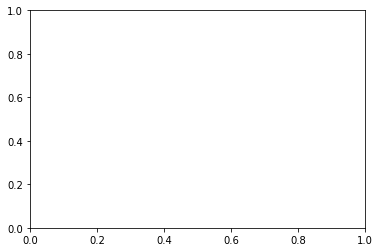

In [150]:
Y_test = np.random.uniform(-2,2,(1,100))

c_test = F(Y_test)


YTest_tilde, aYTest, bYTest = scale(Y_test, alpha, beta)
cTest_tilde, acTest, bcTest = scale(c_test, alpha, beta)

ZTest = getZ(np.resize(YTest_tilde, (2,100)), W, b, K, d, I, h, sigma)
print(ZTest)
ypsilonTest = getYpsilon(ZTest, omega, mu, eta)


ypsilonTest_new = inverseScale(ypsilonTest, acTest, bcTest, alpha, beta)


plt.figure()
plt.plot(Y_test, ypsilonTest_new, label = "test")
plt.plot(Y_test[1], c_test, label = "fasit")
plt.legend()
